In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
in_path = "/Users/Paul/research/files/analysis/devries_sweep_fix.csv"
df_old = pd.read_csv(in_path)
df_old["sweep"] = df_old.apply(lambda row: "old", axis=1)
in_path = "/Users/Paul/research/files/analysis/devries_lossfix_sweep.csv"
df_new = pd.read_csv(in_path)
df_new["sweep"] = df_new.apply(lambda row: "new", axis=1)
in_path = "/Users/Paul/research/files/analysis/devries_exact_repro_sweep.csv"
df_repro = pd.read_csv(in_path)
df_repro["sweep"] = df_repro.apply(lambda row: "repro", axis=1)
df = pd.concat([df_old, df_new, df_repro])

In [3]:
#df.iloc[-1]
df.name.unique()

array(['devries_model_bbvgg13_do0_run1', 'devries_model_bbvgg13_do0_run0',
       'devries_model_bbvgg16_do0_run1', 'devries_model_bbvgg16_do0_run0',
       'devries_model_bbvgg_devries_do0_run1',
       'devries_model_bbvgg_devries_do0_run0',
       'devries_model_bbvgg13_do0_run1_noreflect_relulfirst',
       'devries_model_bbvgg13_do0_run0_noreflect_relulfirst',
       'devries_model_bbvgg13_do0_run1_reflect_relulast',
       'devries_model_bbvgg13_do0_run0_reflect_relulast',
       'devries_model_bbvgg16_do0_run1_noreflect_relulfirst',
       'devries_model_bbvgg16_do0_run0_noreflect_relulfirst',
       'devries_model_bbvgg16_do0_run0_reflect_relulast',
       'devries_model_bbvgg16_do0_run1_reflect_relulast',
       'devries_model_bbvgg13_do0_run0_ne200',
       'devries_model_bbvgg13_do0_run1_ne200',
       'devries_model_bbvgg13_do0_run2_ne200',
       'devries_model_bbvgg16_do0_run0_ne200',
       'devries_model_bbvgg16_do0_run1_ne200',
       'devries_model_bbvgg16_do0_run2_ne

In [4]:
len(df)
df[-10:]

,Unnamed: 0,name,study,model,network,fold,confid,n_test,accuracy,nll,...,e-aurc,aurc,fpr@95tpr,sweep,risk@100cov,risk@95cov,risk@90cov,risk@85cov,risk@80cov,risk@75cov
422,2.0,devries_model_bbvgg16_do0_run0_ne250_apTrue_Co...,new_class_study_cifar100_original_mode,devries_model,vgg16,0.0,devries,18000.0,0.50000,NaN,...,58.25111,211.67752,0.67211,repro,50.00000,48.02339,45.85802,43.47059,40.93307,37.90370
423,0.0,devries_model_bbvgg16_do0_run0_ne250_apTrue_Co...,new_class_study_cifar100_proposed_mode,devries_model,vgg16,0.0,det_mcp,17531.0,0.48662,NaN,...,82.36559,245.24429,0.47811,repro,51.33763,49.00054,46.49851,43.88673,40.88252,37.67014
424,1.0,devries_model_bbvgg16_do0_run0_ne250_apTrue_Co...,new_class_study_cifar100_proposed_mode,devries_model,vgg16,0.0,det_pe,17531.0,0.48662,NaN,...,81.56756,244.44626,0.46456,repro,51.33763,48.86821,46.19724,43.56549,40.79857,37.50000
425,2.0,devries_model_bbvgg16_do0_run0_ne250_apTrue_Co...,new_class_study_cifar100_proposed_mode,devries_model,vgg16,0.0,devries,17531.0,0.48662,NaN,...,48.10098,210.97968,0.51100,repro,51.33763,49.14440,46.74230,44.12159,41.29055,38.00289
426,0.0,devries_model_bbvgg16_do0_run0_ne250_apTrue_Co...,new_class_study_svhn_original_mode,devries_model,vgg16,0.0,det_mcp,34032.0,0.26446,NaN,...,35.51246,419.30741,0.36405,repro,73.55430,72.21638,70.73648,69.18185,67.41086,65.45348
427,1.0,devries_model_bbvgg16_do0_run0_ne250_apTrue_Co...,new_class_study_svhn_original_mode,devries_model,vgg16,0.0,det_pe,34032.0,0.26446,NaN,...,34.43923,418.23419,0.32079,repro,73.55430,72.21054,70.70727,69.05461,67.20764,65.07228
428,2.0,devries_model_bbvgg16_do0_run0_ne250_apTrue_Co...,new_class_study_svhn_original_mode,devries_model,vgg16,0.0,devries,34032.0,0.26446,NaN,...,18.28230,402.07725,0.20602,repro,73.55430,72.17531,70.65200,68.98161,67.06824,64.94672
429,0.0,devries_model_bbvgg16_do0_run0_ne250_apTrue_Co...,new_class_study_svhn_proposed_mode,devries_model,vgg16,0.0,det_mcp,33563.0,0.25418,NaN,...,27.48321,425.15143,0.20086,repro,74.58213,73.26329,71.79886,70.23029,68.45378,66.43895
430,1.0,devries_model_bbvgg16_do0_run0_ne250_apTrue_Co...,new_class_study_svhn_proposed_mode,devries_model,vgg16,0.0,det_pe,33563.0,0.25418,NaN,...,27.04222,424.71044,0.18676,repro,74.58213,73.26099,71.80158,70.15244,68.33389,66.22588
431,2.0,devries_model_bbvgg16_do0_run0_ne250_apTrue_Co...,new_class_study_svhn_proposed_mode,devries_model,vgg16,0.0,devries,33563.0,0.25418,NaN,...,12.66060,410.32882,0.12504,repro,74.58213,73.24761,71.78138,70.14967,68.30286,66.22175


In [5]:
df.groupby("study").count()
df = df.drop(df[df.model=="mcd_sv"].index)
print(len(df))

5909


In [6]:
df_clean = df.drop_duplicates(subset=["sweep", "name", "study", "model", "network", "confid"])

In [7]:
len(df_clean)

4855

In [8]:
df_clean.groupby("name").count()


,Unnamed: 0,study,model,network,fold,confid,n_test,accuracy,nll,brier_score,...,e-aurc,aurc,fpr@95tpr,sweep,risk@100cov,risk@95cov,risk@90cov,risk@85cov,risk@80cov,risk@75cov
name,,,,,,,,,,,,,,,,,,,,,
devries_model_bbvgg13_do0_run0,15,15,15,15,15,15,15,15,3,3,...,15,15,15,15,0,0,0,0,0,0
devries_model_bbvgg13_do0_run0_ne200,27,27,27,27,27,27,27,27,3,3,...,27,27,27,27,0,0,0,0,0,0
devries_model_bbvgg13_do0_run0_ne200_apTrue,27,27,27,27,27,27,27,27,3,3,...,27,27,27,27,27,27,27,27,27,27
devries_model_bbvgg13_do0_run0_ne200_apTrue_CosineAnnealing,27,27,27,27,27,27,27,27,3,3,...,27,27,27,27,27,27,27,27,27,27
devries_model_bbvgg13_do0_run0_ne200_apTrue_CosineAnnealing_normorig,27,27,27,27,27,27,27,27,3,3,...,27,27,27,27,27,27,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
devries_model_bbvgg16_do1_run2_ne200_apTrue,198,198,198,198,198,198,198,198,22,22,...,198,198,198,198,99,99,99,99,99,99
devries_model_bbvgg16_do1_run2_ne250_apFalse,99,99,99,99,99,99,99,99,11,11,...,99,99,99,99,0,0,0,0,0,0
devries_model_bbvgg16_do1_run2_ne250_apTrue,198,198,198,198,198,198,198,198,22,22,...,198,198,198,198,99,99,99,99,99,99


In [9]:
df_clean[df_clean.name=="det_devries_bbvgg16_doTrue_normTrue_schedCosineAnnealing"]

,Unnamed: 0,name,study,model,network,fold,confid,n_test,accuracy,nll,...,e-aurc,aurc,fpr@95tpr,sweep,risk@100cov,risk@95cov,risk@90cov,risk@85cov,risk@80cov,risk@75cov


In [10]:
df = df_clean

In [11]:
df = df.dropna(subset=["name"])

In [12]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
meanprops = dict(linestyle='-', linewidth=1, color='k', alpha=0.5)
whiskerprops=dict(linestyle='-', linewidth=0)
#df[(df.study.str.contains("tinyimagenet_resize_original")) & ~(df.name.str.contains("det"))][["name", "confid", "accuracy", "failauc", "failap_err", "aurc"]].sort_values(by="failauc", ascending=False)

<ipython-input-12-6bbc6dd86d9c>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [13]:
df = df[df.name.str.contains("ne2") ]
df["backbone"] = df.apply(lambda row: row["name"].split("bb")[1].split("_")[0], axis=1)
df["dropout"] = df.apply(lambda row: row["name"].split("do")[1].split("_")[0], axis=1)
df["model"] = df.apply(lambda row: row["name"].split("_")[0], axis=1)
# df["run"] = df.apply(lambda row: row["name"].split("run")[1].split("_")[0] if "run" in row["name"] else "-1", axis=1)
# df["relu"] = df.apply(lambda row: "last" if ("last" in row["name"] or row["backbone"]=="vgg") else "first", axis=1)
# df["reflect"] = df.apply(lambda row: False if ("noreflect" in row["name"] or row["backbone"]=="vgg") else True, axis=1)
df["ne"] = df.apply(lambda row: row["name"].split("ne")[1].split("_")[0], axis=1)
df["ap"] = df.apply(lambda row: False if "apFalse" in row["name"] else True, axis=1)
df["sched"] = df.apply(lambda row: "MultiStep" if "MultiStep" in row["name"] else "Cosine", axis=1)
df["norm"] = df.apply(lambda row: "Orig" if "normorig" in row["name"] else "Devries", axis=1)


# df["ms"] = df.apply(lambda row: False if "msFalse" in row["name"] else True, axis=1)
# df.backbone.tolist()

In [14]:
import numpy as np
non_agg_columns = ["norm", "sweep", "study", "backbone", "ne", "dropout", "ap", "confid", "sched"]
dfg = df.groupby(by=non_agg_columns).mean().reset_index()
dfg_std = df.groupby(by=non_agg_columns).std().reset_index()
rename_dict = {k:"{}_std".format(k) for k in dfg.columns if k not in non_agg_columns }
dfg_std = dfg_std.rename(columns=rename_dict)
print(len(df), len(dfg), len(dfg_std))
print(dfg_std.columns)
print(rename_dict)

4644 1836 1836
Index(['norm', 'sweep', 'study', 'backbone', 'ne', 'dropout', 'ap', 'confid',
       'sched', 'Unnamed: 0_std', 'fold_std', 'n_test_std', 'accuracy_std',
       'nll_std', 'brier_score_std', 'failauc_std', 'failap_suc_std',
       'failap_err_std', 'mce_std', 'ece_std', 'e-aurc_std', 'aurc_std',
       'fpr@95tpr_std', 'risk@100cov_std', 'risk@95cov_std', 'risk@90cov_std',
       'risk@85cov_std', 'risk@80cov_std', 'risk@75cov_std'],
      dtype='object')
{'Unnamed: 0': 'Unnamed: 0_std', 'fold': 'fold_std', 'n_test': 'n_test_std', 'accuracy': 'accuracy_std', 'nll': 'nll_std', 'brier_score': 'brier_score_std', 'failauc': 'failauc_std', 'failap_suc': 'failap_suc_std', 'failap_err': 'failap_err_std', 'mce': 'mce_std', 'ece': 'ece_std', 'e-aurc': 'e-aurc_std', 'aurc': 'aurc_std', 'fpr@95tpr': 'fpr@95tpr_std', 'risk@100cov': 'risk@100cov_std', 'risk@95cov': 'risk@95cov_std', 'risk@90cov': 'risk@90cov_std', 'risk@85cov': 'risk@85cov_std', 'risk@80cov': 'risk@80cov_std', 'risk@

In [37]:
study= "iid_study"
data =  dfg[(dfg.study == study)]
data_std =  dfg_std[(dfg_std.study == study)]
# data =  df[(df.study == "new_class_study_tinyimagenet_resize_original_mode")]
#data =  df[(df.study == "iid_study")  & (df.backbone == "vgg16") ]

In [38]:
data.sweep.unique()

array(['new', 'old', 'repro'], dtype=object)

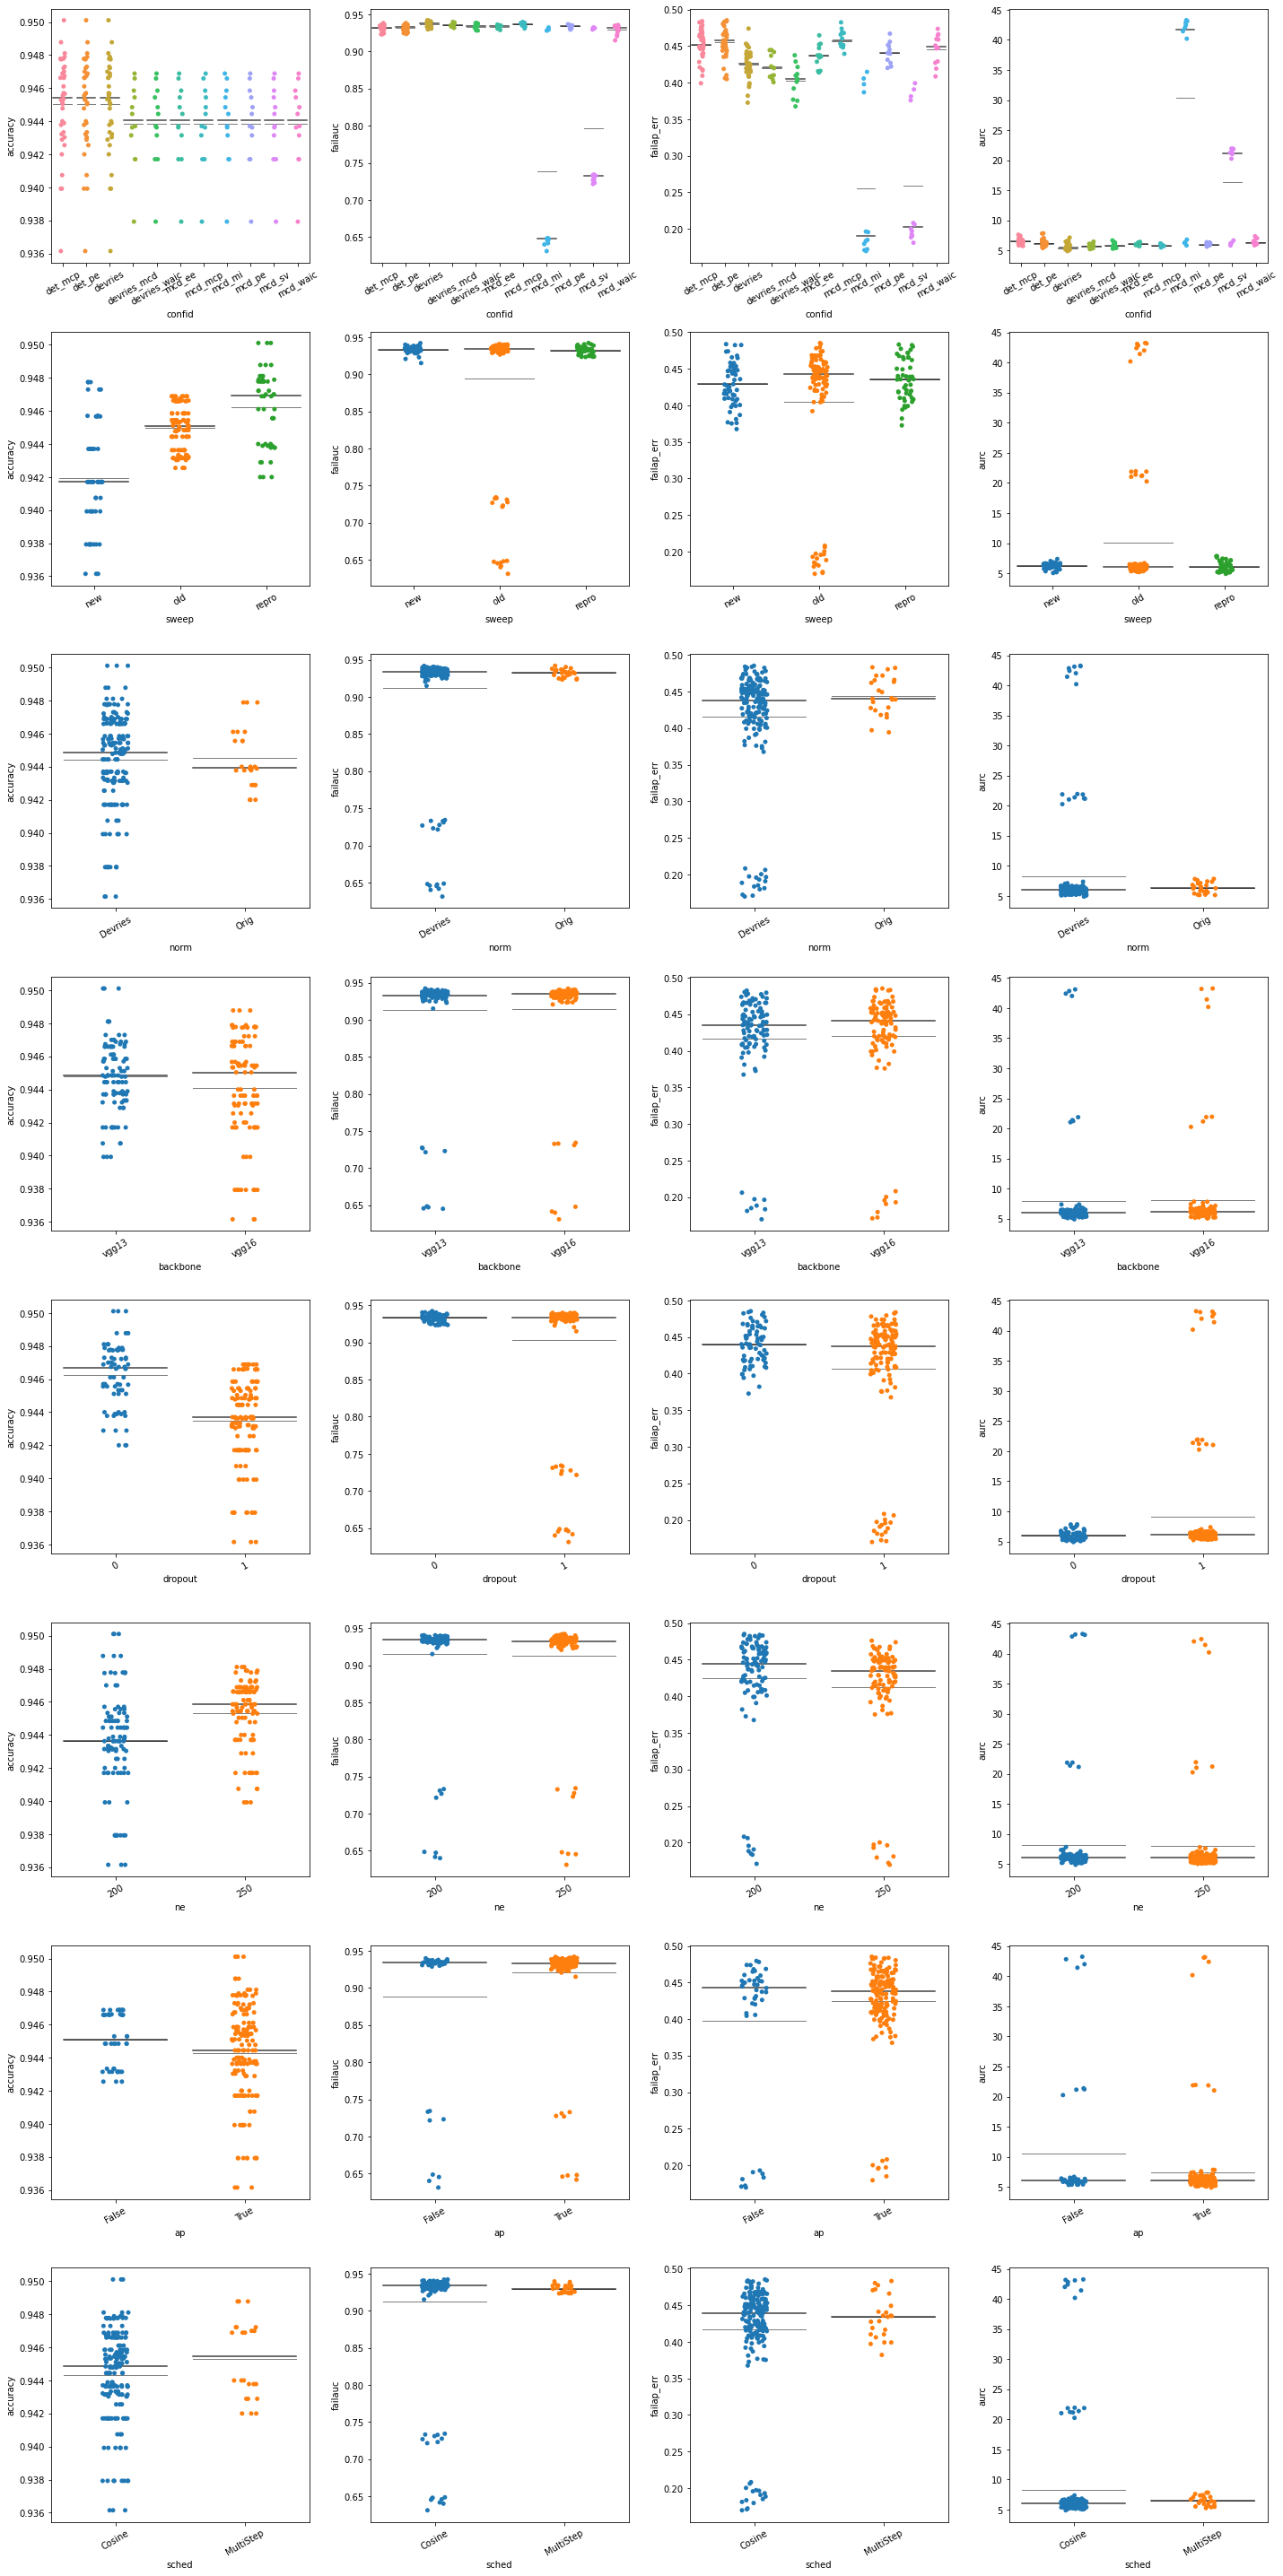

In [39]:
plot_data = data#[(data.confid == "devries")  &  (data.sweep == "new")  ] # [(data["ne"].str.contains("200")) & (data.dropout == "0") ]
dims = ["confid", "sweep", "norm", "backbone", "dropout", "ne", "ap", "sched"]
metrics = ["accuracy", "failauc", "failap_err", "aurc"]
scale = 5
f, axs = plt.subplots(nrows=len(dims), ncols=len(metrics), figsize=(len(metrics)*scale, len(dims)*scale))
for xix, dim in enumerate(dims):
    for yix, metric in enumerate(metrics):
        y = metric
        sns.stripplot(ax=axs[xix, yix], x=dim, y=metric, data=plot_data)
        sns.boxplot(ax=axs[xix, yix], x=dim, y=metric, data=plot_data, saturation=0, showbox=False, showcaps=False, showfliers=False, whiskerprops=whiskerprops, showmeans=True, meanprops=meanprops, meanline=True)
        axs[xix, yix].set_xticklabels(axs[xix, yix].get_xticklabels(),rotation=30)

plt.tight_layout()

In [40]:
std_columns = [c for c in data_std.columns if "std"in c]
for s in std_columns:
    data[s] = data_std[s]

print(data.columns)
print(data_std.columns)
print(len(data))
data[["sweep","backbone", "norm", "ne", "sched", "ap", "dropout", "confid", "failauc", "failauc_std", "aurc", "aurc_std", "failap_suc", "accuracy", "accuracy_std"]].sort_values(by="aurc", ascending=True)

Index(['norm', 'sweep', 'study', 'backbone', 'ne', 'dropout', 'ap', 'confid',
       'sched', 'Unnamed: 0', 'fold', 'n_test', 'accuracy', 'nll',
       'brier_score', 'failauc', 'failap_suc', 'failap_err', 'mce', 'ece',
       'e-aurc', 'aurc', 'fpr@95tpr', 'risk@100cov', 'risk@95cov',
       'risk@90cov', 'risk@85cov', 'risk@80cov', 'risk@75cov',
       'Unnamed: 0_std', 'fold_std', 'n_test_std', 'accuracy_std', 'nll_std',
       'brier_score_std', 'failauc_std', 'failap_suc_std', 'failap_err_std',
       'mce_std', 'ece_std', 'e-aurc_std', 'aurc_std', 'fpr@95tpr_std',
       'risk@100cov_std', 'risk@95cov_std', 'risk@90cov_std', 'risk@85cov_std',
       'risk@80cov_std', 'risk@75cov_std'],
      dtype='object')
Index(['norm', 'sweep', 'study', 'backbone', 'ne', 'dropout', 'ap', 'confid',
       'sched', 'Unnamed: 0_std', 'fold_std', 'n_test_std', 'accuracy_std',
       'nll_std', 'brier_score_std', 'failauc_std', 'failap_suc_std',
       'failap_err_std', 'mce_std', 'ece_std', 'e-aur

<ipython-input-40-87d5df8de1d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[s] = data_std[s]


,sweep,backbone,norm,ne,sched,ap,dropout,confid,failauc,failauc_std,aurc,aurc_std,failap_suc,accuracy,accuracy_std
1408,repro,vgg13,Devries,200,Cosine,True,0,devries,0.934520,NaN,4.900850,NaN,0.996220,0.950110,NaN
44,new,vgg16,Devries,250,Cosine,True,0,devries,0.941987,0.003846,5.047587,0.186118,0.996300,0.945667,0.002889
1414,repro,vgg13,Devries,250,Cosine,True,0,devries,0.939070,NaN,5.097090,NaN,0.996110,0.948110,NaN
1426,repro,vgg16,Devries,250,Cosine,True,0,devries,0.940380,NaN,5.135850,NaN,0.996090,0.947780,NaN
1630,repro,vgg13,Orig,250,Cosine,True,0,devries,0.942200,NaN,5.151940,NaN,0.996160,0.946110,NaN
1642,repro,vgg16,Orig,250,Cosine,True,0,devries,0.937200,NaN,5.152530,NaN,0.996070,0.947890,NaN
30,new,vgg16,Devries,200,Cosine,True,0,devries,0.937637,0.001712,5.170917,0.325082,0.996057,0.947743,0.000836
16,new,vgg13,Devries,250,Cosine,True,0,devries,0.936803,0.001082,5.200040,0.126266,0.996053,0.947297,0.000462
581,old,vgg16,Devries,250,Cosine,True,0,devries,0.940733,0.002839,5.203747,0.229541,0.996080,0.946630,0.002413
1624,repro,vgg13,Orig,200,Cosine,True,0,devries,0.940480,NaN,5.209220,NaN,0.996230,0.943890,NaN


In [32]:
df[(df.study == "iid_study") & (df.dropout == "1")]

,Unnamed: 0,name,study,model,network,fold,confid,n_test,accuracy,nll,brier_score,failauc,failap_suc,failap_err,mce,ece,e-aurc,aurc,fpr@95tpr,sweep,risk@100cov,risk@95cov,risk@90cov,risk@85cov,risk@80cov,risk@75cov,backbone,dropout,ne,ap,sched,norm
709,0.0,devries_model_bbvgg13_do1_run1_ne200_apTrue,iid_study,devries,vgg13,0.0,det_mcp,9000.0,0.94633,0.01911,0.08465,0.93125,0.99484,0.44830,0.26758,0.02777,4.92943,6.39596,0.36646,old,NaN,NaN,NaN,NaN,NaN,NaN,vgg13,1,200,True,Cosine,Devries
710,1.0,devries_model_bbvgg13_do1_run1_ne200_apTrue,iid_study,devries,vgg13,0.0,det_pe,9000.0,0.94633,0.01911,0.08465,0.93119,0.99523,0.44355,0.52134,0.01262,4.55904,6.02557,0.36646,old,NaN,NaN,NaN,NaN,NaN,NaN,vgg13,1,200,True,Cosine,Devries
711,2.0,devries_model_bbvgg13_do1_run1_ne200_apTrue,iid_study,devries,vgg13,0.0,devries,9000.0,0.94633,0.01911,0.08465,0.93482,0.99582,0.40478,0.52296,0.10234,4.00611,5.47264,0.43478,old,NaN,NaN,NaN,NaN,NaN,NaN,vgg13,1,200,True,Cosine,Devries
712,3.0,devries_model_bbvgg13_do1_run1_ne200_apTrue,iid_study,devries,vgg13,0.0,devries_mcd,9000.0,0.94633,0.01911,0.08465,0.93482,0.99582,0.40478,0.52296,0.10234,4.00611,5.47264,0.43478,old,NaN,NaN,NaN,NaN,NaN,NaN,vgg13,1,200,True,Cosine,Devries
713,4.0,devries_model_bbvgg13_do1_run1_ne200_apTrue,iid_study,devries,vgg13,0.0,devries_waic,9000.0,0.94633,0.01911,0.08465,0.93482,0.99582,0.40478,0.52296,0.10234,4.00611,5.47264,0.43478,old,NaN,NaN,NaN,NaN,NaN,NaN,vgg13,1,200,True,Cosine,Devries
714,5.0,devries_model_bbvgg13_do1_run1_ne200_apTrue,iid_study,devries,vgg13,0.0,mcd_mcp,9000.0,0.94633,0.01911,0.08465,0.93177,0.99530,0.44950,0.26747,0.02781,4.49329,5.95982,0.36646,old,NaN,NaN,NaN,NaN,NaN,NaN,vgg13,1,200,True,Cosine,Devries
715,6.0,devries_model_bbvgg13_do1_run1_ne200_apTrue,iid_study,devries,vgg13,0.0,mcd_pe,9000.0,0.94633,0.01911,0.08465,0.93122,0.99524,0.44361,0.52159,0.01261,4.55280,6.01933,0.36646,old,NaN,NaN,NaN,NaN,NaN,NaN,vgg13,1,200,True,Cosine,Devries
716,7.0,devries_model_bbvgg13_do1_run1_ne200_apTrue,iid_study,devries,vgg13,0.0,mcd_ee,9000.0,0.94633,0.01911,0.08465,0.93122,0.99524,0.44361,0.52159,0.01261,4.55276,6.01929,0.36646,old,NaN,NaN,NaN,NaN,NaN,NaN,vgg13,1,200,True,Cosine,Devries
717,8.0,devries_model_bbvgg13_do1_run1_ne200_apTrue,iid_study,devries,vgg13,0.0,mcd_mi,9000.0,0.94633,0.01911,0.08465,0.51002,0.94160,0.07413,0.70916,0.44567,57.25337,58.71990,0.89855,old,NaN,NaN,NaN,NaN,NaN,NaN,vgg13,1,200,True,Cosine,Devries
718,9.0,devries_model_bbvgg13_do1_run1_ne200_apTrue,iid_study,devries,vgg13,0.0,mcd_sv,9000.0,0.94633,0.01911,0.08465,0.61155,0.97047,0.09098,0.05367,0.05367,28.70238,30.16891,0.95652,old,NaN,NaN,NaN,NaN,NaN,NaN,vgg13,1,200,True,Cosine,Devries


In [327]:
import numpy as np
np.std([0.95000, 0.94633, 1])
np.std([95.000, 94.633], ddof=1)

0.25950818869546605